<a href="https://colab.research.google.com/github/Kaikb/Colab/blob/main/LSTM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: This program uses an artificial recurrent neural network called LSTM 

In [5]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end= '2020-12-31')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762


In [9]:
#Get the number of rows and columns in the data set
df.shape

(2265, 6)

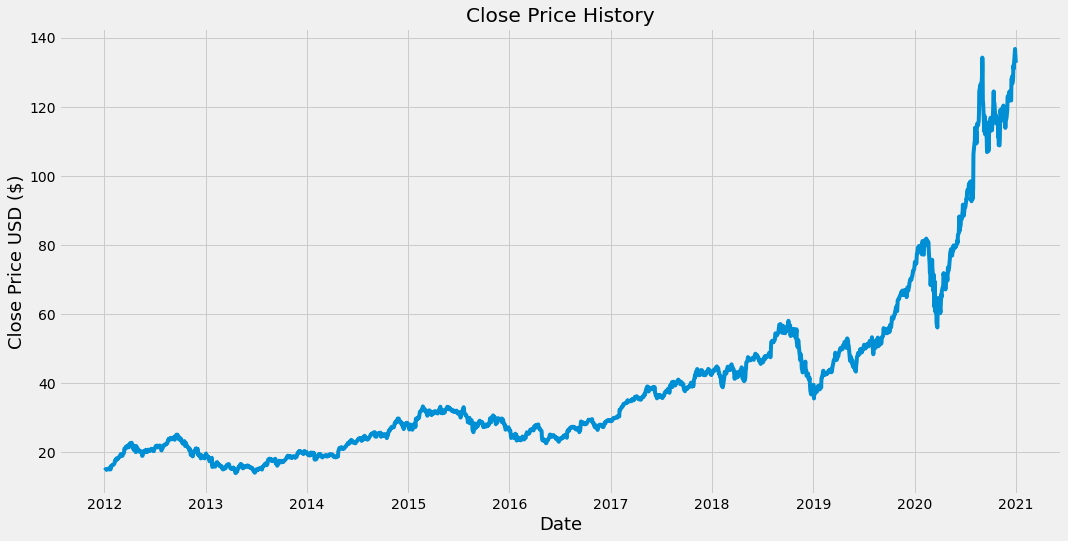

In [15]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date' ,fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [16]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8 )
training_data_len

1812

In [17]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [0.98517215],
       [0.97580299],
       [0.96741145]])

In [19]:
#Create training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00866214, 0.01073094, 0.00869416,
       0.0163321 , 0.01574144, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117444, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420112,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.0440702 , 0.04499548, 0.0469828 , 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.0626835 , 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00

In [20]:
#Conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1752, 60, 1)

In [26]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [28]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [29]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


1752/1752 [==============================] - 42s 22ms/step - loss: 5.0969e-04


In [30]:
#Create the testing data set
#Create a new array containing scaled values from index 1752 to 2265
test_data = scaled_data[training_data_len -60: , :]
#Create the data sets x_test and y_test
x_test =[]
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [31]:
# Convert the data to numpy array
x_test = np.array(x_test)


In [32]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))


In [33]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [35]:
#GEt the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)** 2)
rmse

0.5784948066896687

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


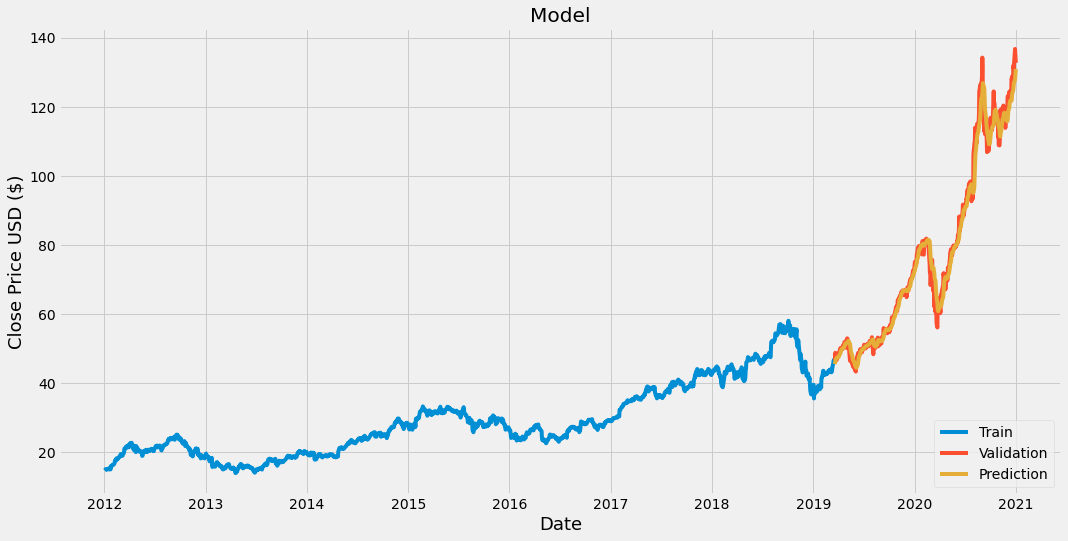

In [36]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Prediction'], loc='lower right')
plt.show()

In [37]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-03-19,46.632500,45.499702
2019-03-20,47.040001,45.889980
2019-03-21,48.772499,46.244930
2019-03-22,47.762501,46.748253
2019-03-25,47.185001,47.146523
...,...,...
2020-12-24,131.970001,126.917740
2020-12-28,136.690002,127.748215
2020-12-29,134.869995,129.053329


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end = '2021-01-15')
#Create a new datafram
new_df = apple_quote.filter(['Close'])
#